In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np
import keras
from keras import layers


In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

--2021-02-04 07:09:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.203.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-02-04 07:09:15 (68.5 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
total_words

3211

In [4]:
len(corpus)

2159

In [5]:
corpus[:10]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,']

In [6]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [7]:
predictors.shape

(15462, 10)

In [8]:
# max_sequence_len demonstrates the max number of words in sentence
max_sequence_len-1

10

In [9]:

model = keras.models.Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(layers.Dense(total_words, activation='relu')) 
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
dense (Dense)                (None, 10, 3211)          324311    
_________________________________________________________________
lstm (LSTM)                  (None, 10, 128)           1710080   
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              414219    
Total params: 3,032,878
Trainable params: 3,032,878
Non-trainable params: 0
______________________________________________

In [11]:
# where does the 484 in each epoch come from?
history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
484/484 [==============================] - 5s 11ms/step - loss: 6.8882 - accuracy: 0.0228
Epoch 2/50
484/484 [==============================] - 5s 11ms/step - loss: 6.5137 - accuracy: 0.0244
Epoch 3/50
484/484 [==============================] - 5s 11ms/step - loss: 6.4076 - accuracy: 0.0333
Epoch 4/50
484/484 [==============================] - 5s 10ms/step - loss: 6.3041 - accuracy: 0.0371
Epoch 5/50
484/484 [==============================] - 5s 11ms/step - loss: 6.2040 - accuracy: 0.0402
Epoch 6/50
484/484 [==============================] - 5s 11ms/step - loss: 6.0962 - accuracy: 0.0435
Epoch 7/50
484/484 [==============================] - 5s 10ms/step - loss: 5.9992 - accuracy: 0.0453
Epoch 8/50
484/484 [==============================] - 5s 11ms/step - loss: 5.8987 - accuracy: 0.0490
Epoch 9/50
484/484 [==============================] - 5s 10ms/step - loss: 5.7979 - accuracy: 0.0521
Epoch 10/50
484/484 [==============================] - 5s 11ms/step - loss: 5.6896 - accura

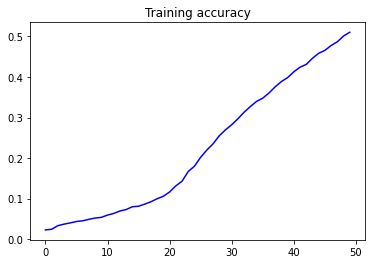

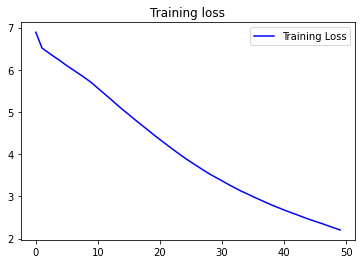

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()


In [13]:
#outcome of the seed text without - with learning rate chosen for Adam optimizer 
seed_text = "Oh God thy help me as you can only be"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Oh God thy help me as you can only be ill near note doth stay the very same wit luck day appear part doth crave rage go wide ocean go wide bower doom that date hours that winter's thereby sight doth lie too blessed dyed less than thy report hand altering bounty up his trim sight doth cover his treasure control thee men from weeds days made it mend away have strengthseem air shall view it dwell age night to white mother free free gems approve a story must be twain my verses tend doth taken his 'will ' say still hour thee are lie a mortal cure all badness


The generated text doesn't sound very cohesive understandably.

Model with this architecture was able to achieve 50% accuracy. Not a bad start indeed!